In [1]:
import numpy as np
import pandas as pd

# 1.统计函数

### 1.1 `.pct_change()`

* `.diff()`
* `.shift()`

In [11]:
ser = pd.Series(np.random.randint(0, 8, 8))
ser

0    5
1    2
2    4
3    7
4    4
5    7
6    3
7    1
dtype: int32

In [14]:
ser.pct_change()
ser.pct_change(periods = 1)

0         NaN
1   -0.600000
2    1.000000
3    0.750000
4   -0.428571
5    0.750000
6   -0.571429
7   -0.666667
dtype: float64

In [15]:
df = pd.DataFrame(np.random.randn(10, 4))
df.pct_change(periods = 3)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,1.365358,-1.074896,0.289730,-0.557523
4,-0.594102,-0.888841,-2.712664,-0.339559
5,-1.815215,-0.819778,-2.330314,3.495265
6,-1.495718,1.902033,-0.480644,-1.419928
7,7.134778,-0.447034,-1.100587,-2.139088
8,-2.140782,0.851668,-1.610192,-0.963102
9,-1.698629,-0.748475,-1.370471,-12.257557


### 1.2 协方差

* `.cov()`

In [16]:
s1 = pd.Series(np.random.randn(1000))
s2 = pd.Series(np.random.randn(1000))
s1.cov(s2)

0.015450878793577432

In [17]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns = ['a', 'b', 'c', 'd', 'e'])
frame.cov()

,a,b,c,d,e
a,0.946454,-0.054057,0.009719,0.038715,0.052421
b,-0.054057,0.937027,-0.007399,0.012612,0.001437
c,0.009719,-0.007399,0.973717,0.010324,-0.033294
d,0.038715,0.012612,0.010324,1.065249,0.057435
e,0.052421,0.001437,-0.033294,0.057435,1.016317


In [32]:
frame = pd.DataFrame(np.random.randn(20, 3), columns = ['A', 'B', 'C'])
frame.loc[frame.index[:5], 'A'] = np.nan
frame.loc[frame.index[5:10], 'B'] = np.nan
frame

,A,B,C
0,NaN,0.570339,1.073467
1,NaN,-0.789493,-2.336095
2,NaN,0.081204,1.424512
3,NaN,0.704950,-0.210690
4,NaN,0.253196,0.103186
5,-0.451049,NaN,0.382968
6,0.239972,NaN,0.022390
7,1.284250,NaN,0.271303
8,-1.456956,NaN,-1.537672
9,-2.044936,NaN,-2.144174


In [38]:
frame.loc[pd.notna(frame.A) & pd.notna(frame.B), ['A', 'B']].count()

A    10
B    10
dtype: int64

In [26]:
frame.cov()

,A,B,C
A,1.161467,0.490924,-0.173989
B,0.490924,0.971300,-0.375195
C,-0.173989,-0.375195,1.274393


In [39]:
frame.cov(min_periods = 10)

,A,B,C
A,1.500001,-0.438644,0.150750
B,-0.438644,0.880553,0.641879
C,0.150750,0.641879,1.560860


In [40]:
frame.cov(min_periods = 11)

,A,B,C
A,1.500001,NaN,0.150750
B,NaN,0.880553,0.641879
C,0.150750,0.641879,1.560860


### 1.3相关系数

* `.corr(min_periods, method)`
* `.corrwith(aixs)`

In [41]:
frame = pd.DataFrame(np.random.randn(1000, 5),
                     columns = ['a', 'b', 'c', 'd', 'e'])
frame.iloc[::2] = np.nan
frame

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,0.224509,-1.729321,-0.955799,1.004216,0.013226
2,NaN,NaN,NaN,NaN,NaN
3,0.399200,0.654893,-1.162254,-0.201766,-0.193647
4,NaN,NaN,NaN,NaN,NaN
5,-1.305265,-0.858285,1.447090,-1.140128,-1.400836
6,NaN,NaN,NaN,NaN,NaN
7,0.078564,-1.866708,0.219859,-1.351523,-0.449065
8,NaN,NaN,NaN,NaN,NaN
9,1.106006,0.957828,-0.136288,0.435111,0.493566


In [42]:
frame['a'].corr(frame['b'])

-0.001971314584916372

In [43]:
frame.corr()

,a,b,c,d,e
a,1.000000,-0.001971,0.019437,0.053726,-0.038433
b,-0.001971,1.000000,0.031085,0.066806,0.013148
c,0.019437,0.031085,1.000000,-0.053313,-0.035946
d,0.053726,0.066806,-0.053313,1.000000,-0.008592
e,-0.038433,0.013148,-0.035946,-0.008592,1.000000


In [49]:
frame.corr(min_periods = 600)

,a,b,c,d,e
a,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN


In [51]:
def histogram_intersection(a, b):
    return np.minimum(np.true_divide(a, a.sum()), np.true_divide(b, b.sum())).sum()

frame.corr(method = histogram_intersection)

,a,b,c,d,e
a,1.000000,-12.031598,-18.616009,-9.126661,-92.727080
b,-12.031598,1.000000,-19.302882,-10.571410,-92.084099
c,-18.616009,-19.302882,1.000000,-17.161122,-94.088876
d,-9.126661,-10.571410,-17.161122,1.000000,-92.146244
e,-92.727080,-92.084099,-94.088876,-92.146244,1.000000


In [52]:
index = ['a', 'b', 'c', 'd', 'e']
columns = ['one', 'two', 'three', 'four']
df1 = pd.DataFrame(np.random.randn(5, 4), index = index, columns = columns)
df2 = pd.DataFrame(np.random.randn(4, 4), index = index[:4], columns = columns)
df1.corrwith(df2)

one      0.412556
two      0.787205
three    0.137102
four     0.548683
dtype: float64

In [53]:
df1.corrwith(df2, axis = 1)

a    0.325365
b    0.427367
c    0.862426
d   -0.158437
e         NaN
dtype: float64

### 1.4 数据排序

* `.rank(axis, ascending, method, na_option, numeric_only, pct)`

In [61]:
s = pd.Series(np.random.randn(5), index = list('abcde'))
s['d'] = s['b']
s

a    0.877505
b    0.028075
c   -0.867969
d    0.028075
e    0.271120
dtype: float64

In [70]:
s.rank()

a    5.0
b    2.5
c    1.0
d    2.5
e    4.0
dtype: float64

In [72]:
s.rank(method = 'average') 

a    5.0
b    2.5
c    1.0
d    2.5
e    4.0
dtype: float64

In [74]:
s.rank(method = 'min')

a    5.0
b    2.0
c    1.0
d    2.0
e    4.0
dtype: float64

In [75]:
s.rank(method = 'max')

a    5.0
b    3.0
c    1.0
d    3.0
e    4.0
dtype: float64

In [77]:
s.rank(method = 'first')

a    5.0
b    2.0
c    1.0
d    3.0
e    4.0
dtype: float64

In [78]:
s.rank(method = 'dense')

a    4.0
b    2.0
c    1.0
d    2.0
e    3.0
dtype: float64

In [65]:
df = pd.DataFrame(np.random.randn(10, 6))
df[4] = df[2][:5]
df

,0,1,2,3,4,5
0,0.385564,0.080207,0.288518,0.440173,0.288518,2.695966
1,0.529164,0.053638,0.198104,0.475328,0.198104,-1.094462
2,-1.462040,0.527519,-0.160757,-0.779242,-0.160757,-0.025711
3,0.203278,-0.038271,-1.001771,-0.502056,-1.001771,0.566583
4,0.444489,-0.191348,0.243136,-0.594253,0.243136,1.987892
5,-0.890112,0.787145,-2.563797,-0.326596,NaN,0.517692
6,0.030386,1.283345,-1.332230,0.501104,NaN,0.843410
7,0.265069,0.051534,-0.166089,0.426179,NaN,0.914005
8,0.101784,0.442905,-2.619545,-0.734467,NaN,0.344307
9,1.376062,0.779743,0.203885,1.253375,NaN,-2.429243


In [69]:
df.rank(axis = 1, ascending = False)

,0,1,2,3,4,5
0,3.0,6.0,4.5,2.0,4.5,1.0
1,1.0,5.0,3.5,2.0,3.5,6.0
2,6.0,1.0,3.5,5.0,3.5,2.0
3,2.0,3.0,5.5,4.0,5.5,1.0
4,2.0,5.0,3.5,6.0,3.5,1.0
5,4.0,1.0,5.0,3.0,NaN,2.0
6,4.0,1.0,5.0,3.0,NaN,2.0
7,3.0,4.0,5.0,2.0,NaN,1.0
8,3.0,1.0,5.0,4.0,NaN,2.0
9,1.0,3.0,4.0,2.0,NaN,5.0


In [67]:
df.rank(axis= 0)

,0,1,2,3,4,5
0,7.0,5.0,10.0,7.0,5.0,10.0
1,9.0,4.0,7.0,8.0,3.0,2.0
2,1.0,7.0,6.0,1.0,2.0,3.0
3,5.0,2.0,4.0,4.0,1.0,6.0
4,8.0,1.0,9.0,3.0,4.0,9.0
5,2.0,9.0,2.0,5.0,NaN,5.0
6,3.0,10.0,3.0,9.0,NaN,7.0
7,6.0,3.0,5.0,6.0,NaN,8.0
8,4.0,6.0,1.0,2.0,NaN,4.0
9,10.0,8.0,8.0,10.0,NaN,1.0


### 1.5 窗口函数

In [82]:
s = pd.Series(np.random.randn(1000), 
              index = pd.date_range('1/1/2000', periods = 1000, freq = 'D'))
s = s.cumsum()

In [83]:
r = s.rolling(window = 60)
r

Rolling [window=60,center=False,axis=0]

In [93]:
r.mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-08          NaN
2000-01-09          NaN
2000-01-10          NaN
2000-01-11          NaN
2000-01-12          NaN
2000-01-13          NaN
2000-01-14          NaN
2000-01-15          NaN
2000-01-16          NaN
2000-01-17          NaN
2000-01-18          NaN
2000-01-19          NaN
2000-01-20          NaN
2000-01-21          NaN
2000-01-22          NaN
2000-01-23          NaN
2000-01-24          NaN
2000-01-25          NaN
2000-01-26          NaN
2000-01-27          NaN
2000-01-28          NaN
2000-01-29          NaN
2000-01-30          NaN
                ...    
2002-08-28   -69.148578
2002-08-29   -69.218958
2002-08-30   -69.263869
2002-08-31   -69.305080
2002-09-01   -69.324706
2002-09-02   -69.330312
2002-09-03   -69.321423
2002-09-04   -69.321697
2002-09-05   -69.337451
2002-09-06   -69.347270
2002-09-07   -69

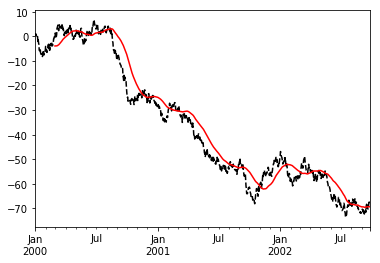

In [89]:
s.plot(style = 'k--')
r.mean().plot(style = 'r')